In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating Path
path = r"C:\Users\David\Desktop\04-23 Instacart Basket Analysis"

In [3]:
# Import orders_products_merged.pkl to combine in Step 6
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_merged.pkl'))

In [4]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,order_freq_flag,first_name,last_name,gender,state,age,date_joined,total_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


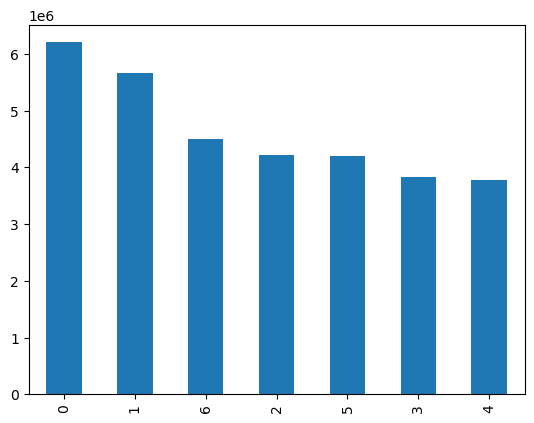

In [5]:
# Create a bar chart
bar = df['order_day_of_week'].value_counts().plot.bar()

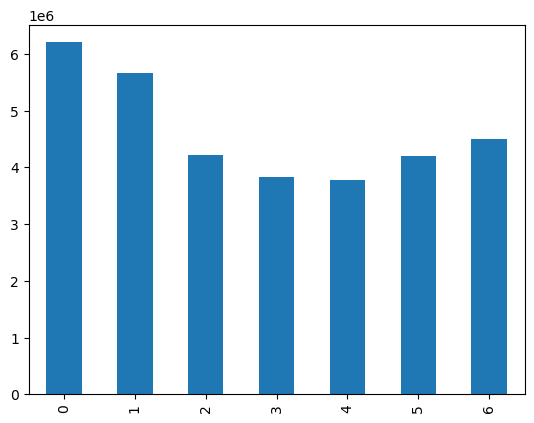

In [6]:
# Sort the bar graph in order
bar = df['order_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
# Export the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_ords_dow.png'))

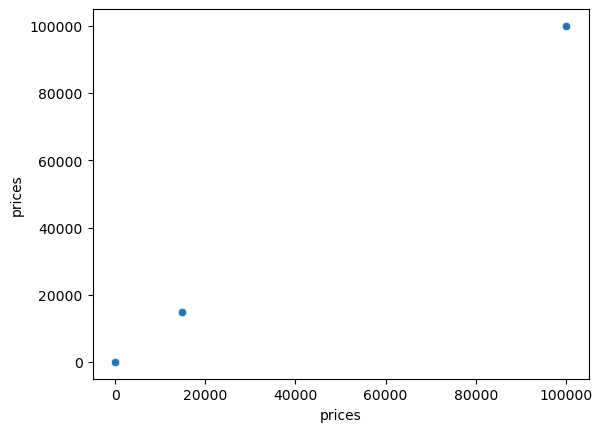

In [8]:
# Create a scatterplot
scatplt = sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [9]:
scatplt.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatplt_prices.png'))

In [10]:
# Determine whether there are any values above a certain threshold in the data. The following assumes that the max price
# someone would pay at the supermarket is $100, so anything above it would be considered an outlier. 

df.loc[df['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,order_freq_flag,first_name,last_name,gender,state,age,date_joined,total_dependants,marital_status,income
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,Frequent customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,Regular customer,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,Non-frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [11]:
# Marks anything above 100 as missing so it doesn't skew the data / graphs
df.loc[df['prices'] >100, 'prices'] = np.nan

In [12]:
# Check to see what the max price is now
df['prices'].max()

25.0

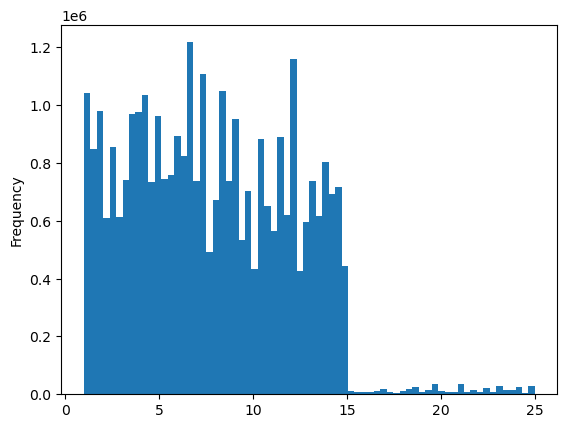

In [13]:
# Create a histogram 
hist = df['prices'].plot.hist(bins = 70)

In [14]:
# Export the histogram
hist.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'hist_prices_70.png' ))

In [15]:
# Create a line chart
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [16]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [17]:
np.random.rand(5)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171])

In [18]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(df)) <= 0.7

In [19]:
# Store 70% of sample in the dataframe big
big = df[dev]

In [20]:
# Store 30% of sample in the dataframe small
small = df[~dev]

In [21]:
# Check length of the entire dataframe
len(df)

32404859

In [22]:
# Check length of the sample dataframe
len(big)+len(small)

32404859

In [23]:
# Creates new dataframe where prices and order_day_of_week columns are from the small subset
df_2 = small[['order_day_of_week','prices']]

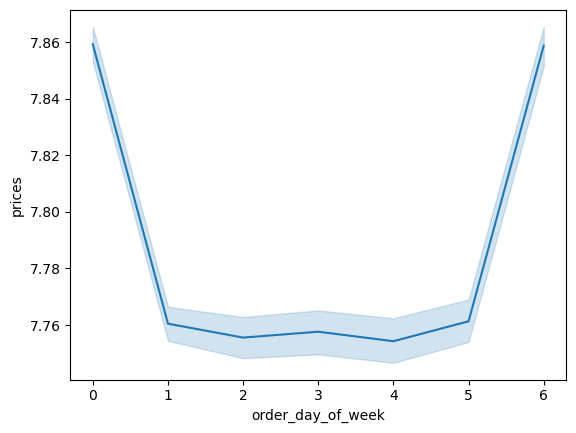

In [24]:
# Creates the line graph
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

In [25]:
# Export the line chart
line.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_ords_dow.png' ))

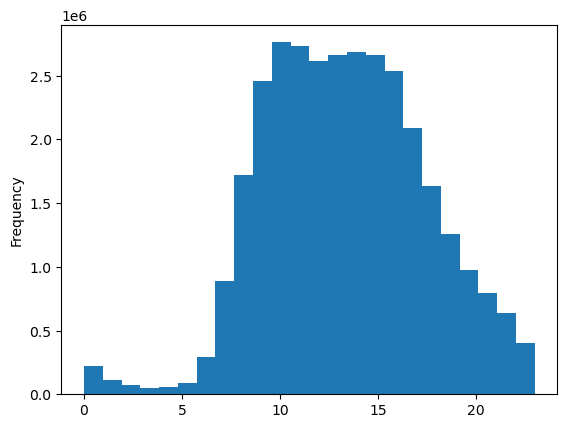

In [26]:
hist_hour = df['order_hour_of_day'].plot.hist(bins = 24)

# The above histograms shows the frequency of shoppers at different hours of the day from 0 to 24 (military time). The most
 frequent time for shoppers is between 10-17, which is 10am to 5pm. This is a reasonable time for people to be shopping, 
 especially on the weekends (the most frequent days) as the DOW bar chart from earlier showed. 

In [28]:
# Export the above histogram
hist_hour.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'hist_ords_hour.png' ))

In [29]:
df.dtypes

order_id                    int64
user_id                    object
order_number                int64
order_day_of_week           int64
order_hour_of_day           int64
days_since_last_order     float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                    int64
department_id               int64
prices                    float64
_merge                   category
busiest_days               object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
avg_price                 float64
spending_flag              object
median_freq               float64
order_freq_flag            object
first_name                 object
last_name                  object
gender                     object
state                      object
age                         int64
date_joined                object
total_dependants            int64
marital_status

In [30]:
df['max_order'] = df.groupby(['user_id'])['order_number'].transform(np.max)

In [31]:
df.loc[df['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [32]:
df.loc[(df['max_order'] <= 40) & (df['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [33]:
df.loc[df['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [34]:
df['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

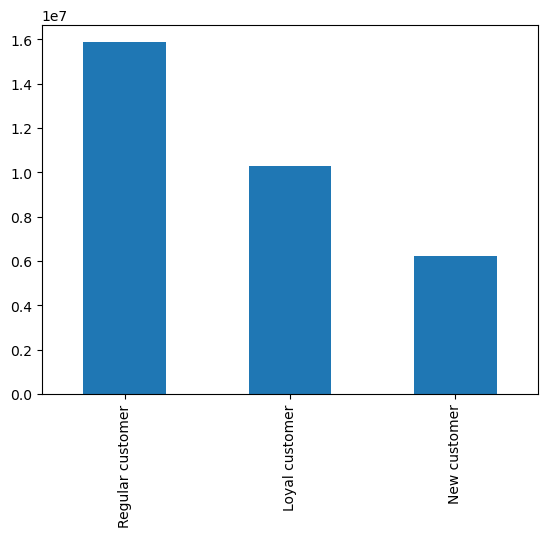

In [35]:
cust_bar = df['loyalty_flag'].value_counts().plot.bar()

In [36]:
# Export the bar chart
cust_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'cust_loyalty_flag.png' ))

# Step 5

In [37]:
# Create new df to see if there's a difference in spending based on the times
df_3 = small[['prices', 'order_hour_of_day'] ]

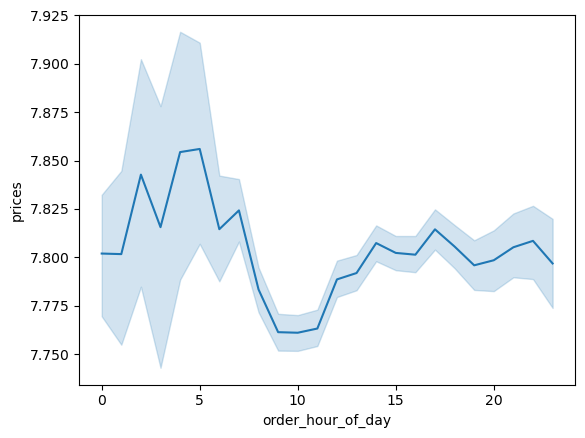

In [38]:
# Create line chart using the above df
line_hour = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [39]:
# Export the line chart
line_hour.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'expenditures_hour.png' ))

# Step 6

In [40]:
# Using the small sample set again to answer whether there is a connection between age and family
df_4 = small[['age', 'total_dependants']]

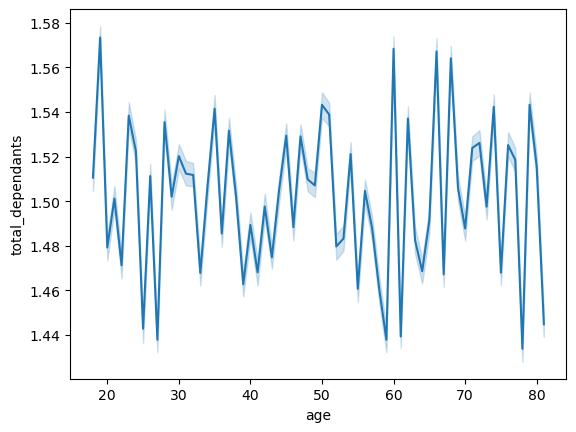

In [41]:
# Create line chart using the above df
line_age = sns.lineplot (data = df_4, x = 'age', y = 'total_dependants')

In [42]:
# Export the line chart
line_age.figure.savefig(os.path.join (path,'04 Analysis', 'Visualizations', 'age_dependants_connection.png'))

# There's really no connection between customer's age and number of dependants

# Step 7

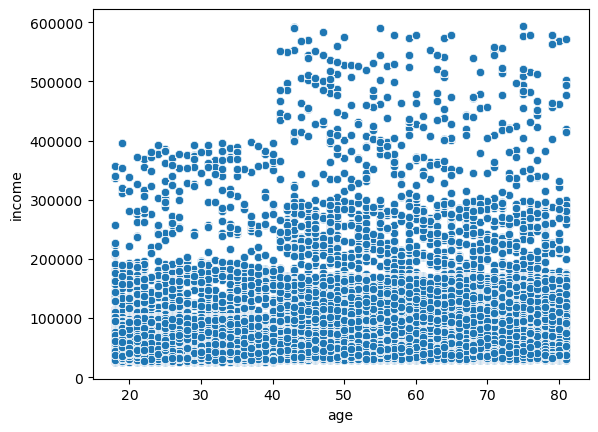

In [43]:
# Create a scatterplot of age and income
scatter_income = sns.scatterplot(data = df, x= 'age', y = 'income')

In [44]:
# Export the scatterplot
scatter_income.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'income_scatter.png'))

# It shows that as age progresses past 40, generally more people make more. Otherwise it seems rather random

In [45]:
# Exporting the merged data into a new pickle file
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'customer_merged_new.pkl'))